In [1]:
import numpy as np

In [19]:
def activate(x,threshold,lower,upper):
    return lower + (upper-lower) * 0.5 * (np.sign(x-threshold) + 1)
def repress(x,threshold,lower,upper):
    return upper - activate(x,threshold,lower,upper)

In [62]:
def f(u, t):
    return [
        -u[0] + activate(u[1],2.0,0.3,2.8) - repress(u[0],0.5,1.0,2.0) , 
        -u[1] + repress(u[0],1.2,0.5,1.4) * activate(u[1],0.3,0.1,2.0)
    ]


In [63]:
from scipy.integrate import odeint

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 10.0
numpoints = 250

# Create the time samples for the output of the ODE solver.
t = np.linspace(0.0,stoptime,numpoints)

# Pack up the parameters and initial conditions:
w0 = [2.5, 1.4]

# Call the ODE solver.
wsol = odeint(f, w0, t,atol=abserr, rtol=relerr)


<IPython.core.display.Javascript object>


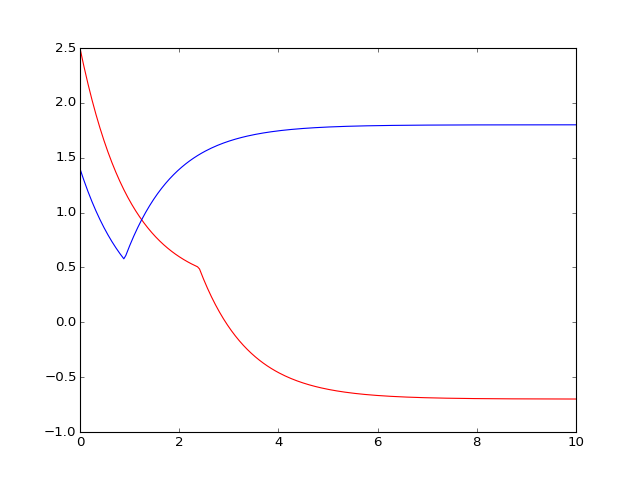

In [64]:
from matplotlib.pyplot import *
%matplotlib notebook

plot(t, wsol[:,0], 'r-',t,wsol[:,1],'b-')